[2024-11-15 Fiddler](https://thefiddler.substack.com/p/can-you-figure-out-how-magna-tiles)
====================

Fiddler
-------
I think one tile has all the north poles in the corners and the other tile has all the south poles
in the corners.

It's also possible that one tile has one magnet flipped so that one corner and one middle become
unmagnetized, or one tile has two magnets flipped as long as the flipped magnets are at least 3 away
from each other along the perimeter.

If both tiles have one magnet flipped, means it's possible to have the unmagnetized middles against
each other, with an unmagnetized corner against each magentized corner.

If one tile has two flipped magnets that are adjacent, if they share a side, the middle becomes
repulsive, while its corners are unmagnetized.  If they share a corner, the corner becomes repulsive,
while the adjacent middles are unmagnetized.

If one tile has two flipped magnets that are 2 away from each other, then one side and its corners
become unmagnetized.

### Intended answer
I think the intended answer is the magnets are aligned to the $z$-axis and alternate between the north
pole facing up and the south pole facing up when going around the perimeter, which makes the extra
credit make more sense.  This would also mean both tiles would have the same configuration.  There
are two possible configurations, where the polarities of one are opposite those of the other: when
looking at a corner from the center of the tile, looking from the N pole to the S pole on the magnets
on either side of the corner could be either clockwise or counterclockwise around the corner.

Another possible configuration would be that one tile has all the north poles facing out and all the
south poles facing in, and the other has them reversed.

Extra credit
------------
My initial guess is that the tiles are rotated 45° from each other, assuming all the monopoles on one
of the tiles are N and all the monopoles on the other are S.  But modeling magnets means having only
pairs of opposing monopoles on each tile.

Based on the -54.27 energy, I surmise that the monopoles alternate between N and S on a tile when going
around the perimeter.  This means the tiles will repel each other if one is flipped over.

Let the monopoles on one of the tiles be

In [1]:
x1 = [-1/4, 1/4, 1/2,  1/2,  1/4, -1/4, -1/2, -1/2]
y1 = [ 1/2, 1/2, 1/4, -1/4, -1/2, -1/2, -1/4,  1/4]
q1 = [  -1,   1,  -1,    1,   -1,    1,   -1,    1]

And the monopoles on the other tile are

In [2]:
z = 1/10
r = sqrt(5/16)
x2 = []
y2 = []
q2 = []
for i in [0..7]:
    f(x,y,theta) = r*cos(theta+atan2(y1[i],x1[i]))+x
    x2.append(f)
    f(x,y,theta) = r*sin(theta+atan2(y1[i],x1[i]))+y
    y2.append(f)
    q2.append(-q1[i])

And a picture of one of the tiles directly above the other tile is

In [3]:
def pic(x,y,theta):
    return line([(-1/2,-1/2),(1/2,-1/2),(1/2,1/2),(-1/2,1/2),(-1/2,-1/2)],axes=false,color='black') \
        + line([(-1/2,0),(1/2,0)],color='black',linestyle='dotted') \
        + line([(0,-1/2),(0,1/2)],color='black',linestyle='dotted') \
        + line([(cos(theta+pi/4)/sqrt(2)+x,sin(theta+pi/4)/sqrt(2)+y),
                (cos(theta+3*pi/4)/sqrt(2)+x,sin(theta+3*pi/4)/sqrt(2)+y),
                (cos(theta+5*pi/4)/sqrt(2)+x,sin(theta+5*pi/4)/sqrt(2)+y),
                (cos(theta+7*pi/4)/sqrt(2)+x,sin(theta+7*pi/4)/sqrt(2)+y),
                (cos(theta+pi/4)/sqrt(2)+x,sin(theta+pi/4)/sqrt(2)+y)],color='red') \
        + line([(-cos(theta)/2+x,-sin(theta)/2+y),(cos(theta)/2+x,sin(theta)/2+y)],color='red',linestyle='dotted') \
        + line([(-cos(theta+pi/2)/2+x,-sin(theta+pi/2)/2+y),(cos(theta+pi/2)/2+x,sin(theta+pi/2)/2+y)],color='red',linestyle='dotted') \
        + sum([circle((x1[i],y1[i]),0.03,color='black',fill='black' if q1[i] > 0 else None) for i in [0..7]]) \
        + sum([circle((x2[i](x,y,theta),y2[i](x,y,theta)),0.02,color='red',fill='red' if q2[i] > 0 else None) for i in [0..7]])

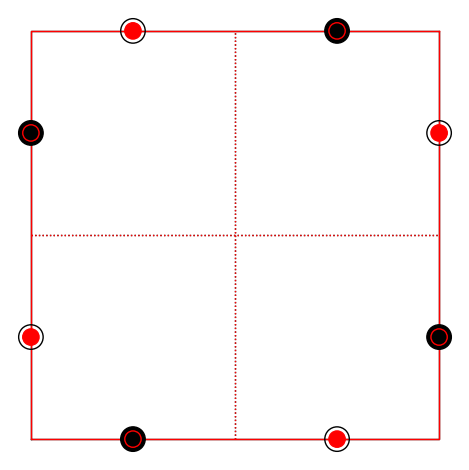

In [4]:
pic(0,0,0)

The energy between the tiles is

In [5]:
E(x,y,theta) = sum([sum([q1[i]*q2[j]/sqrt(z^2+(x1[i]-x2[j](x,y,theta))^2+(y1[i]-y2[j](x,y,theta))^2)
                         for j in [0..7]]) for i in [0..7]])

which, when the top tile is directly above the bottom tile, is

In [6]:
show(E(0,0,0).simplify())
numerical_approx(E(0,0,0))

80/227*sqrt(454) - 160/127*sqrt(254) + 80/101*sqrt(101) + 40/13*sqrt(26) - 40/21*sqrt(14) + 80/9*sqrt(6) - 80

-54.2735496531888

Doing a power series expansion around zero displacement and zero rotation shows that
there are no linear terms, so it's an equilibrium.

In [7]:
taylor(E(x,y,theta),(x,0),(y,0),(theta,0),2)

250/40684203297174181525707151953*x^2*(12298736604571234202142576*sqrt(454) - 76904189873992525258966752*sqrt(254) + 30958346526873756616905552*sqrt(101) + 425915646715979142053374827*sqrt(26) - 60038596810428731330453631*sqrt(14) + 2083507439087109433415272528*sqrt(6) + 650947252754786904411314431248) + 250/40684203297174181525707151953*y^2*(12298736604571234202142576*sqrt(454) - 76904189873992525258966752*sqrt(254) + 30958346526873756616905552*sqrt(101) + 425915646715979142053374827*sqrt(26) - 60038596810428731330453631*sqrt(14) + 2083507439087109433415272528*sqrt(6) + 650947252754786904411314431248) + 125/1291562009434101000816100062*theta^2*(550099706995384335228348*sqrt(454) - 4728956972771087001855000*sqrt(254) + 1511814298324009980563172*sqrt(101) + 32627078526896952910921053*sqrt(26) - 2440593366277590704489985*sqrt(14) + 180712379920820716163569556*sqrt(6) + 12915620094341010008161000620) + 80/227*sqrt(454) - 160/127*sqrt(254) + 80/101*sqrt(101) + 40/13*sqrt(26) - 40/21*sqrt(1

And the signs of all the quadratic terms are positive, so it's stable.

In [8]:
(numerical_approx(taylor(E(x,y,theta),(x,0),(y,0),(theta,0),2)(x=1,y=0,theta=0)-E(0,0,0)),
 numerical_approx(taylor(E(x,y,theta),(x,0),(y,0),(theta,0),2)(x=0,y=1,theta=0)-E(0,0,0)),
 numerical_approx(taylor(E(x,y,theta),(x,0),(y,0),(theta,0),2)(x=0,y=0,theta=1)-E(0,0,0)))

(4039.31604234419, 4039.31604234419, 1303.36898871790)

I no longer think a 45° rotation results in a stable equilibrium,
but let's see what that looks like,

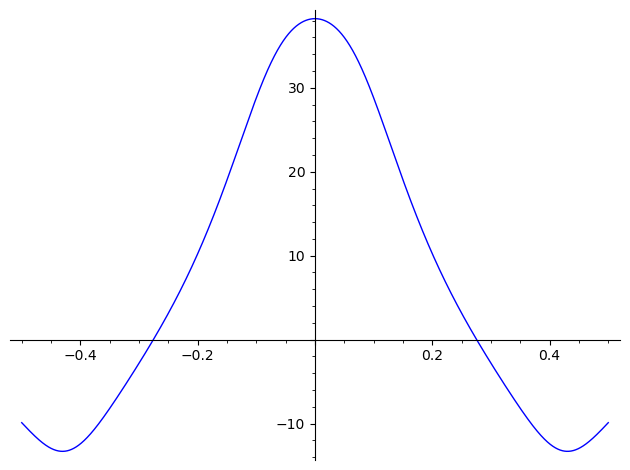

In [9]:
plot(E(x,0,pi/4),x,-1/2,1/2)

It's unstable, but it looks like there's a stable point after a translation of about 0.4.

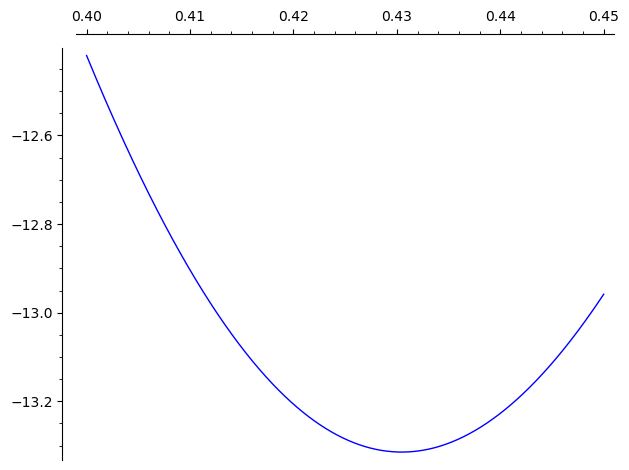

In [10]:
plot(E(x,0,pi/4), 0.4,0.45)

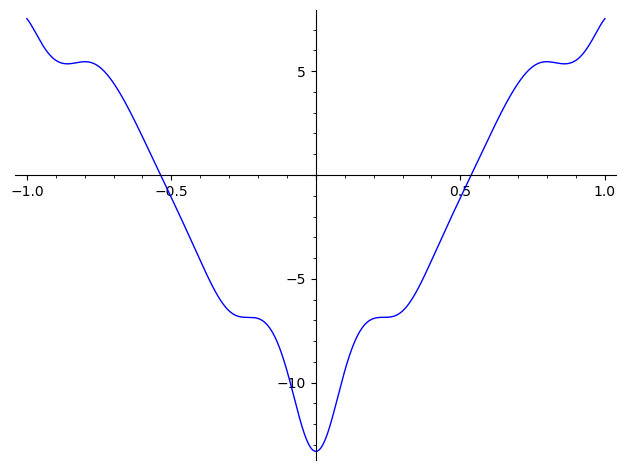

In [11]:
plot(E(0.43,y,pi/4), -1, 1)

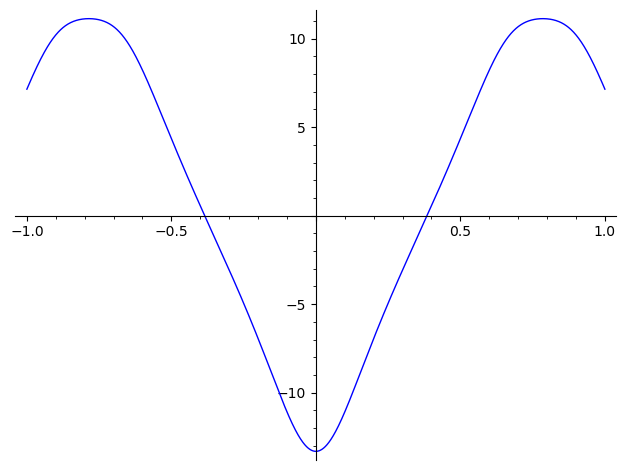

In [12]:
plot(E(0.43,0,pi/4+theta), -1, 1)

And the tile rotated by 45° and translated by 0.43 looks close to a stable equilibrium.
Let's see what it looks like

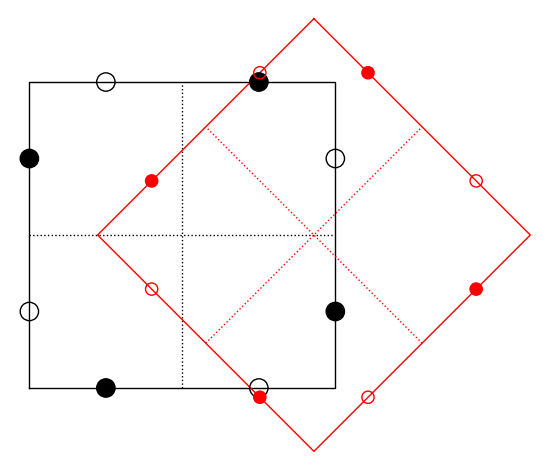

In [13]:
pic(0.43,0,pi/4)

I'll guess the exact translation is when the horizontal positions of the nearly overlapping
monopoles match.

In [14]:
sol = solve(x1[1] - x2[1](x,0,pi/4), x)
dx = sol[0].rhs().simplify_full()
show(dx)
(numerical_approx(dx),dx)

1/8*sqrt(2)*(sqrt(2) + 1)

(0.426776695296637, 1/8*sqrt(2)*(sqrt(2) + 1))

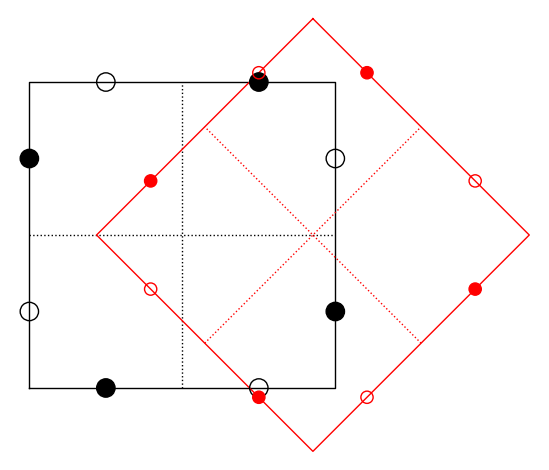

In [15]:
pic(dx,0,pi/4)

I'll note that the displacement could be either horizontal or vertical and in either direction,
as expected due to symmetry.

In [16]:
(numerical_approx(E(dx,0,pi/4)),
 numerical_approx(E(-dx,0,pi/4)),
 numerical_approx(E(0,dx,pi/4)),
 numerical_approx(E(0,-dx,pi/4)),
 numerical_approx(E(dx,0,-pi/4)))

(-13.3011086437948,
 -13.3011086437948,
 -13.3011086437948,
 -13.3011086437948,
 -13.3011086437948)

It takes too long for the computer to do a power series expansion around this configuration,
so I'll assume that it's the answer.

However, looking into it further, it's close, but not the answer.  Numerically getting a
better approximation,

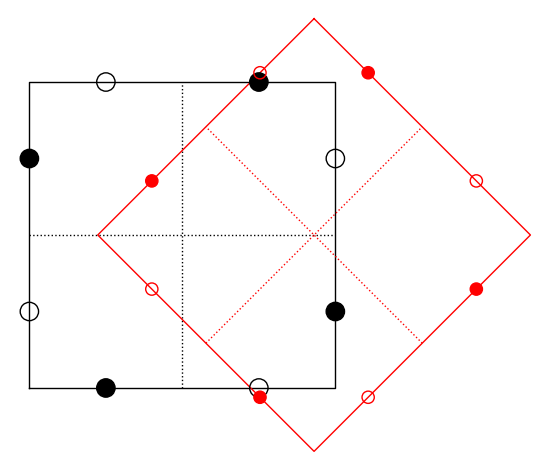

(-13.3145634911549, 0.4304754197906244)

In [17]:
m = find_local_minimum(E(x,0,pi/4),0.4,0.45)
show(pic(m[1],0,pi/4))
m

So the answer is to rotate one tile 45° and translate approximately 0.4305, for an energy of
approximately -13.31.

Additional stable configurations
--------------------------------

In [18]:
def t(x,y,theta,dx=0.1,dy=0.1,dtheta=pi):
    (x,y,theta) = minimize_constrained(E,[(x-dx,x+dx),(y-dy,y+dy),(theta-dtheta,theta+dtheta)],[x,y,theta])
    print(f"x≈{x},y≈{y},theta≈{theta}")
    return pic(x,y,theta) + text(f"E≈{numerical_approx(E(x,y,theta))}", (0,1/10))

x≈0.0,y≈0.0,theta≈0.0


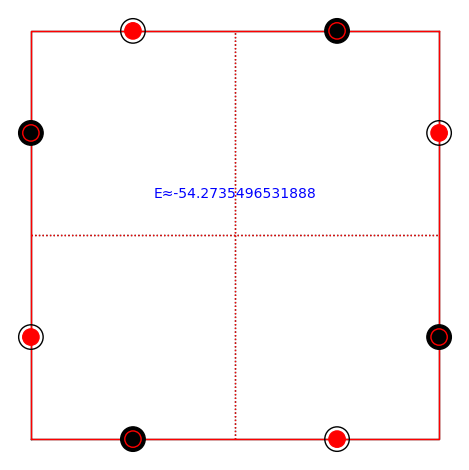

In [19]:
t(0,0,0)

x≈0.4304754196962843,y≈-2.355483895651799e-15,theta≈0.7853981634053079


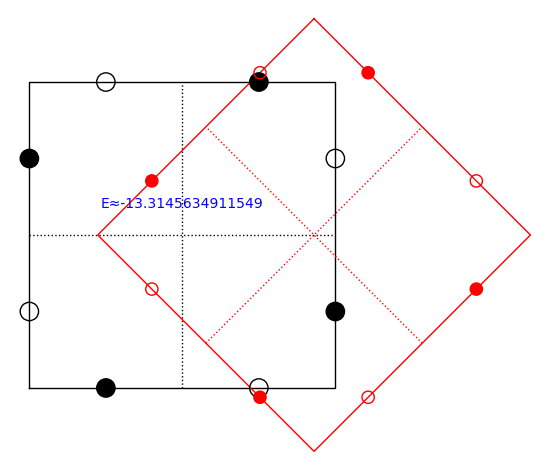

In [20]:
t(0.43,0,pi/4)

x≈0.7537214359909945,y≈0.25617101365383493,theta≈-1.7735733897565836e-05


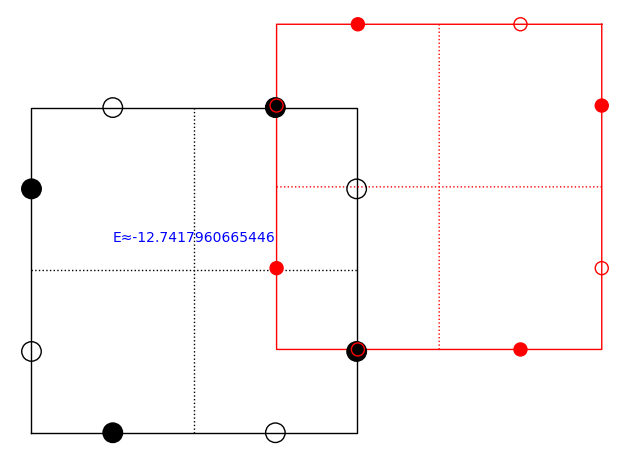

In [21]:
t(3/4,1/4,0)

x≈1.0363281156947584,y≈-1.3677400488149505e-11,theta≈0.7853981949012658


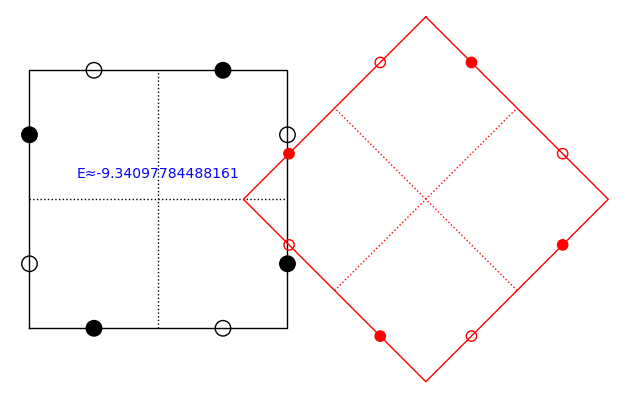

In [22]:
t(1,0,pi/4)

And this last one, with $E\approx-7.336$, is actually unstable to rotation,
the minimization algorithm must be getting tripped up by numerical noise.

x≈0.9936108743726222,y≈0.5000002900849242,theta≈0.022790642787146986


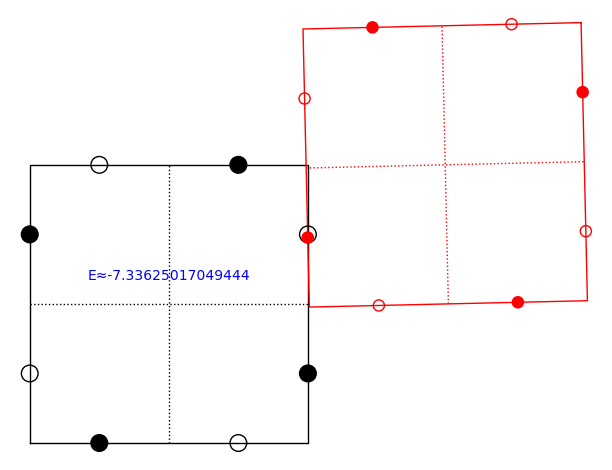

In [23]:
t(1,1/2,0,dy=0.0001,dtheta=0.1)

Another look at stable configurations
-------------------------------------
Instead of rotating around the center of the tile, rotate around one of the monopoles.
Then, looking at a plot of $E(0,0,\theta)$, since there is no place where a monopole
could be approximately equidistant from three monopoles of the same polarity without
a monopole of the opposite polarity being near enough to destabilize it and due to
symmetry, we should see a minimum near every distinct minimum of $E$.

In [24]:
x3 = []
y3 = []
q3 = []
for i in [0..7]:
    dx = x1[i]-x1[2]
    dy = y1[i]-y1[2]
    r = sqrt(dx^2+dy^2)
    f(x,y,theta) = x1[2]+r*cos(theta+atan2(dy,dx))+x
    x3.append(f)
    f(x,y,theta) = y1[2]+r*sin(theta+atan2(dy,dx))+y
    y3.append(f)
    q3.append(-q1[i])

xtile = [-1/2, 1/2, 1/2,-1/2,   0, 1/2,   0,-1/2]
ytile = [ 1/2, 1/2,-1/2,-1/2, 1/2,   0,-1/2,   0]
for i in [0..7]:
    dx = xtile[i]-x1[2]
    dy = ytile[i]-y1[2]
    r = sqrt(dx^2+dy^2)
    f(x,y,theta) = x1[2]+r*cos(theta+atan2(dy,dx))+x
    xtile[i] = f
    f(x,y,theta) = y1[2]+r*sin(theta+atan2(dy,dx))+y
    ytile[i] = f

E2(x,y,theta) = sum([sum([q1[i]*q3[j]/sqrt(z^2+(x1[i]-x3[j](x,y,theta))^2+(y1[i]-y3[j](x,y,theta))^2)
                         for j in [0..7]]) for i in [0..7]])

def pic2(x,y,theta,xoff=0,yoff=0):
    return line([(xoff-1/2,yoff-1/2),(xoff+1/2,yoff-1/2),
                 (xoff+1/2,yoff+1/2),(xoff-1/2,yoff+1/2),
                 (xoff-1/2,yoff-1/2)],axes=false,color='black') \
        + line([(xoff-1/2,yoff),(xoff+1/2,yoff)],color='black',linestyle='dotted') \
        + line([(xoff,yoff-1/2),(xoff,yoff+1/2)],color='black',linestyle='dotted') \
        + line([(xoff+xtile[0](x,y,theta),yoff+ytile[0](x,y,theta)),
                (xoff+xtile[1](x,y,theta),yoff+ytile[1](x,y,theta)),
                (xoff+xtile[2](x,y,theta),yoff+ytile[2](x,y,theta)),
                (xoff+xtile[3](x,y,theta),yoff+ytile[3](x,y,theta)),
                (xoff+xtile[0](x,y,theta),yoff+ytile[0](x,y,theta))],color='red') \
        + line([(xoff+xtile[4](x,y,theta),yoff+ytile[4](x,y,theta)),
                (xoff+xtile[6](x,y,theta),yoff+ytile[6](x,y,theta))],color='red',linestyle='dotted') \
        + line([(xoff+xtile[5](x,y,theta),yoff+ytile[5](x,y,theta)),
                (xoff+xtile[7](x,y,theta),yoff+ytile[7](x,y,theta))],color='red',linestyle='dotted') \
        + sum([circle((xoff+x1[i],yoff+y1[i]),0.03,color='black',fill='black' if q1[i] > 0 else None) for i in [0..7]]) \
        + sum([circle((xoff+x3[i](x,y,theta),yoff+y3[i](x,y,theta)),0.02,color='red',
                      fill='red' if q3[i] > 0 else None) for i in [0..7]]) \
         + text(f"E≈{numerical_approx(E2(x,y,theta))}", (xoff,yoff+1/10))

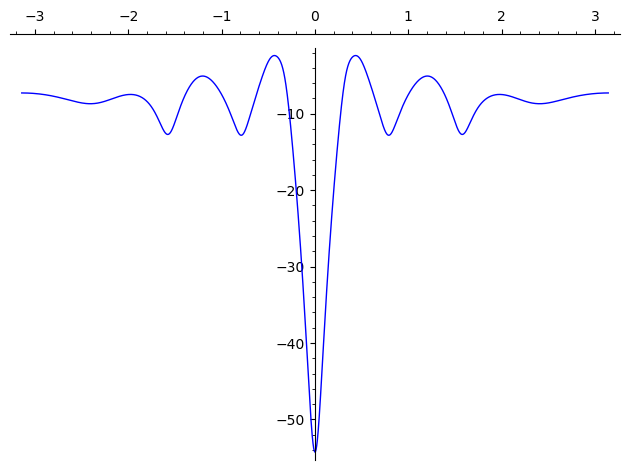

In [25]:
plot(E2(0,0,x),x,-pi,pi)

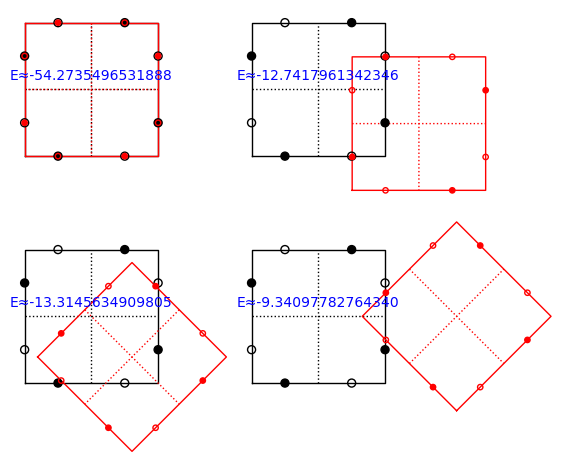

In [26]:
p = pic2(0,0,0)
for i in [1..3]:
    (x,y,theta) = minimize_constrained(E2,[(-0.2,0.2),(-0.2,0.2),(i*pi/4-0.2,i*pi/4+0.2)],[0,0,i*pi/4])
    p += pic2(x,y,theta,xoff=0 if i == 1 else 1.7,yoff=0 if mod(i,2) == 0 else -1.7)
p

### My Fiddler solution
My Fiddler solution of having all the north or south poles in the corners turned into monopoles
would have a similar set of stable configurations, though with a little different symmetries.

In [27]:
xc1 = [-1/2,   0, 1/2, 1/2, 1/2,   0,-1/2,-1/2]
yc1 = [ 1/2, 1/2, 1/2,   0,-1/2,-1/2,-1/2,   0]
qc1 = [   1,   -1,  1,  -1,   1,  -1,   1,  -1]

xc2 = []
yc2 = []
qc2 = []

for i in [0..7]:
    dx1 = xc1[i]-xc1[2]
    dy1 = yc1[i]-yc1[2]
    r1 = sqrt(dx1^2+dy1^2)
    dx2 = xc1[i]-xc1[3]
    dy2 = yc1[i]-yc1[3]
    r2 = sqrt(dx2^2+dy2^2)
    f1(x,y,theta) = xc1[2]+r1*cos(theta+atan2(dy1,dx1))+x
    f2(x,y,theta) = xc1[3]+r2*cos(theta+atan2(dy2,dx2))+x
    xc2.append([f1,f2])
    f1(x,y,theta) = yc1[2]+r1*sin(theta+atan2(dy1,dx1))+y
    f2(x,y,theta) = yc1[3]+r2*sin(theta+atan2(dy2,dx2))+y
    yc2.append([f1,f2])
    qc2.append(-qc1[i])

Ec1(x,y,theta) = sum([sum([qc1[i]*qc2[j]/sqrt(z^2+(xc1[i]-xc2[j][0](x,y,theta))^2
                                              +(yc1[i]-yc2[j][0](x,y,theta))^2)
                           for j in [0..7]]) for i in [0..7]])
Ec2(x,y,theta) = sum([sum([qc1[i]*qc2[j]/sqrt(z^2+(xc1[i]-xc2[j][1](x,y,theta))^2
                                              +(yc1[i]-yc2[j][1](x,y,theta))^2)
                           for j in [0..7]]) for i in [0..7]])
Ec = [Ec1,Ec2]

def pic3(x,y,theta,pivot,xoff=0,yoff=0):
    return line([(xoff-1/2,yoff-1/2),(xoff+1/2,yoff-1/2),
                 (xoff+1/2,yoff+1/2),(xoff-1/2,yoff+1/2),
                 (xoff-1/2,yoff-1/2)],axes=false,color='black') \
        + line([(xoff-1/2,yoff),(xoff+1/2,yoff)],color='black',linestyle='dotted') \
        + line([(xoff,yoff-1/2),(xoff,yoff+1/2)],color='black',linestyle='dotted') \
        + line([(xoff+xc2[0][pivot](x,y,theta),yoff+yc2[0][pivot](x,y,theta)),
                (xoff+xc2[2][pivot](x,y,theta),yoff+yc2[2][pivot](x,y,theta)),
                (xoff+xc2[4][pivot](x,y,theta),yoff+yc2[4][pivot](x,y,theta)),
                (xoff+xc2[6][pivot](x,y,theta),yoff+yc2[6][pivot](x,y,theta)),
                (xoff+xc2[0][pivot](x,y,theta),yoff+yc2[0][pivot](x,y,theta))],color='red') \
        + line([(xoff+xc2[1][pivot](x,y,theta),yoff+yc2[1][pivot](x,y,theta)),
                (xoff+xc2[5][pivot](x,y,theta),yoff+yc2[5][pivot](x,y,theta))],color='red',linestyle='dotted') \
        + line([(xoff+xc2[3][pivot](x,y,theta),yoff+yc2[3][pivot](x,y,theta)),
                (xoff+xc2[7][pivot](x,y,theta),yoff+yc2[7][pivot](x,y,theta))],color='red',linestyle='dotted') \
        + sum([circle((xoff+xc1[i],yoff+yc1[i]),0.03,color='black',fill='black' if q1[i] > 0 else None) for i in [0..7]]) \
        + sum([circle((xoff+xc2[i][pivot](x,y,theta),yoff+yc2[i][pivot](x,y,theta)),0.02,color='red',
                      fill='red' if q3[i] > 0 else None) for i in [0..7]]) \
         + text(f"E≈{numerical_approx(Ec[pivot](x,y,theta,pivot))}", (xoff,yoff+1/10))

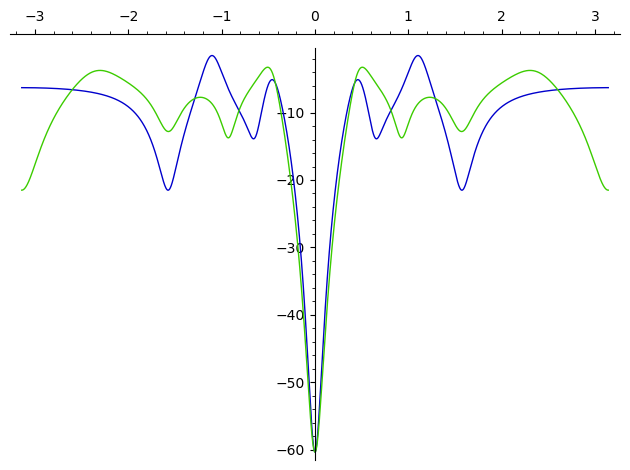

In [28]:
plot([Ec1(0,0,theta),Ec2(0,0,theta)],theta,-pi,pi)

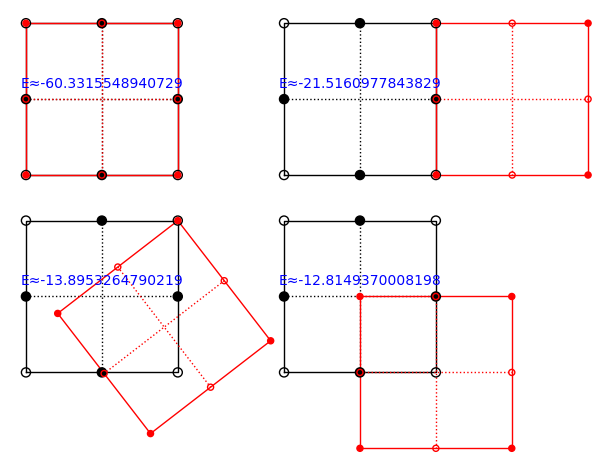

In [29]:
p = pic3(0,0,0,0)
(x,y,theta) = minimize_constrained(Ec1,[(-0.2,0.2),(-0.2,0.2),(pi/4-0.2,pi/4+0.2)],[0,0,pi/4])
p += pic3(x,y,theta,0,xoff=0,yoff=-1.3)
(x,y,theta) = minimize_constrained(Ec1,[(-0.2,0.2),(-0.2,0.2),(pi/2-0.2,pi/2+0.2)],[0,0,pi/2])
p += pic3(x,y,theta,0,xoff=1.7,yoff=0)
(x,y,theta) = minimize_constrained(Ec2,[(-0.2,0.2),(-0.2,0.2),(1.4,1.8)],[0,0,1.6])
p += pic3(x,y,theta,1,xoff=1.7,yoff=-1.3)
p

Making the rounds
-----------------
Let the sides of the triangle be $a$, $b$, and $c$.

From the 16 square, $a/b = (a-4)/4$, and $a/b = 4/(b-4)$.
From the 15 square, $c = a\sqrt{15}/b + \sqrt{15} + b\sqrt{15}/a$, so
$15(1 + a/b + b/a)^2 = a^2 + b^2$.

In [30]:
a,b = var('a,b')
sols = solve([a/b == (a-4)/4, 15*(1 + a/b + b/a)^2 == a^2 + b^2], [a,b])
show(sols)

[[a == 2*sqrt(21) - 6, b == -2*sqrt(21) - 6], [a == -2*sqrt(21) - 6, b == 2*sqrt(21) - 6], [a == 2*sqrt(5) + 10, b == -2*sqrt(5) + 10], [a == -2*sqrt(5) + 10, b == 2*sqrt(5) + 10], [a == 0, b == 0]]

In [31]:
[(sol[0].rhs()*sol[1].rhs()/2).simplify_full() for sol in sols]

[-24, -24, 40, 40, 0]

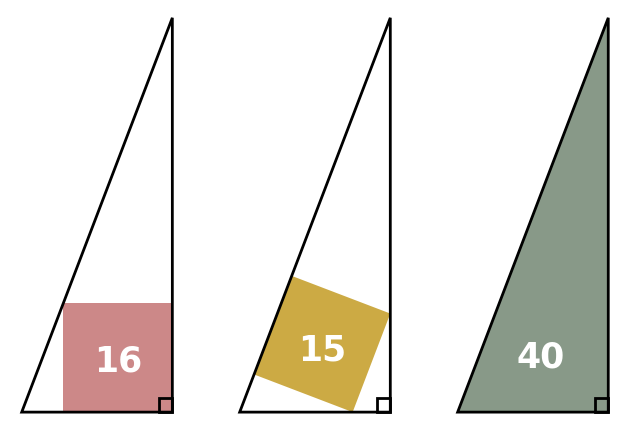

In [32]:
a = 10-2*sqrt(5)
b = 10+2*sqrt(5)
c = sqrt(a^2+b^2)
polygon([(-4,0),(-4,4),(0,4),(0,0)],color='#c88',axes=false) \
    + polygon([(-a,0),(0,0),(0,b)],color='black',fill=false,thickness=2) \
    + polygon([(-1/2,0),(-1/2,1/2),(0,1/2),(0,0)],color='black',fill=false,thickness=2) \
    + polygon([(8-a/c*sqrt(15),0),(8,b/c*sqrt(15)),
               (8-b/c*sqrt(15),(a+b)/c*sqrt(15)),
               (8-(a+b)/c*sqrt(15),a/c*sqrt(15))],color='#ca4') \
    + polygon([(8-a,0),(8,0),(8,b)],color='black',fill=false,thickness=2) \
    + polygon([(8-1/2,0),(8-1/2,1/2),(8,1/2),(8,0)],color='black',fill=false,thickness=2) \
    + polygon([(16-a,0),(16,0),(16,b)],color='#898') \
    + polygon([(16-a,0),(16,0),(16,b)],color='black',fill=false,thickness=2) \
    + polygon([(16-1/2,0),(16-1/2,1/2),(16,1/2),(16,0)],color='black',fill=false,thickness=2) \
    + text('16',(-2,15/8),color='white',fontsize=25,fontweight='heavy') \
    + text('15',(11/2,9/4),color='white',fontsize=25,fontweight='heavy') \
    + text('40',(27/2,2),color='white',fontsize=25,fontweight='heavy')